# 🔷 Overview

The **Apriori Algorithm** is a fundamental approach in **Association Rule Learning (ARL)**, used for discovering interesting relationships between items in large datasets. It is based on the **Apriori Principle**, which states that if an itemset is frequent, then all of its subsets must also be frequent.

Apriori is widely applied in **market basket analysis**, **recommendation systems**, **fraud detection**, and **medical diagnosis**.

---

## 🔹 What is Apriori Algorithm?

The **Apriori Algorithm** is a rule-based learning method that applies the concept of **frequent itemsets** to generate association rules. These rules help in understanding relationships between variables and making data-driven decisions.

It works by:
1. Identifying **frequent itemsets** in a transaction dataset.
2. Applying the **Apriori Principle** to reduce computation.
3. Generating **strong association rules** based on support, confidence, and lift.

---

## 🔥 Popular Measures in Association Rule Learning:

- **Support** 📊 – Measures how frequently an itemset appears in the dataset.
- **Confidence** ✅ – Indicates the likelihood of occurrence of item B given item A.
- **Lift** 📈 – Measures how much more likely A and B occur together than if they were independent.

---

## 📌 Key Strengths & Limitations:

🔹 **Key Strengths**: Efficient for rule mining, widely used in business analytics, handles large datasets well.

⚠️ **Limitations**: Computationally expensive for large datasets, may generate too many rules, requires careful parameter tuning.

---

💡 **Use Cases**:
- 🛒 **Market Basket Analysis**: Understanding customer purchasing behavior.
- 🎯 **Recommendation Systems**: Suggesting related products or services.
- 🔍 **Fraud Detection**: Identifying unusual transactions in financial data.

# 🔴 The Apriori Algorithm Formula:

The Apriori Algorithm is based on the **Apriori Principle**, which states:

$$
\forall X, Y: (X \subseteq Y) \wedge (Support(Y) \geq min\_support) \Rightarrow Support(X) \geq min\_support
$$

This means that if an itemset \( Y \) is frequent, then all of its subsets \( X \) must also be frequent.

---

### 🔹 Support, Confidence, and Lift:

- **Support** 📊: Measures how frequently an itemset appears in the dataset.
  
  $$
  Support(A) = \frac{\text{Transactions containing } A}{\text{Total transactions}}
  $$

- **Confidence** ✅: Measures the likelihood of \( B \) occurring given that \( A \) has occurred.

  $$
  Confidence(A \Rightarrow B) = \frac{Support(A \cup B)}{Support(A)}
  $$

- **Lift** 📈: Measures how much more likely \( A \) and \( B \) occur together than if they were independent.

  $$
  Lift(A \Rightarrow B) = \frac{Confidence(A \Rightarrow B)}{Support(B)}
  $$

---

## 🟠 Choosing the Right Thresholds:

To generate **useful** association rules, we define **minimum support**, **minimum confidence**, and **minimum lift** values.

- **High Support** 🔼: Ensures that the rule is relevant to a large portion of transactions.
- **High Confidence** ✅: Ensures the rule is reliable in making predictions.
- **High Lift** 📊: Ensures that the occurrence of \( B \) given \( A \) is significant.

---

## 🟢 Key Insights:

✔ **Apriori is efficient for rule-based learning** in datasets with categorical variables.  
✔ **Widely used in market basket analysis, fraud detection, and recommendation systems**.  
✔ **Can handle large datasets but may be slow without optimizations** (e.g., FP-Growth).  
⚠️ **May generate too many rules**, requiring post-filtering to keep only meaningful insights.

---

💡 **Use Cases**:
- 🛒 **Market Basket Analysis**: Understanding co-purchasing behavior.
- 🎯 **Recommendation Systems**: Suggesting relevant products or services.
- 🔍 **Fraud Detection**: Identifying patterns in financial transactions.


# WIZ 🎯🎯🎯

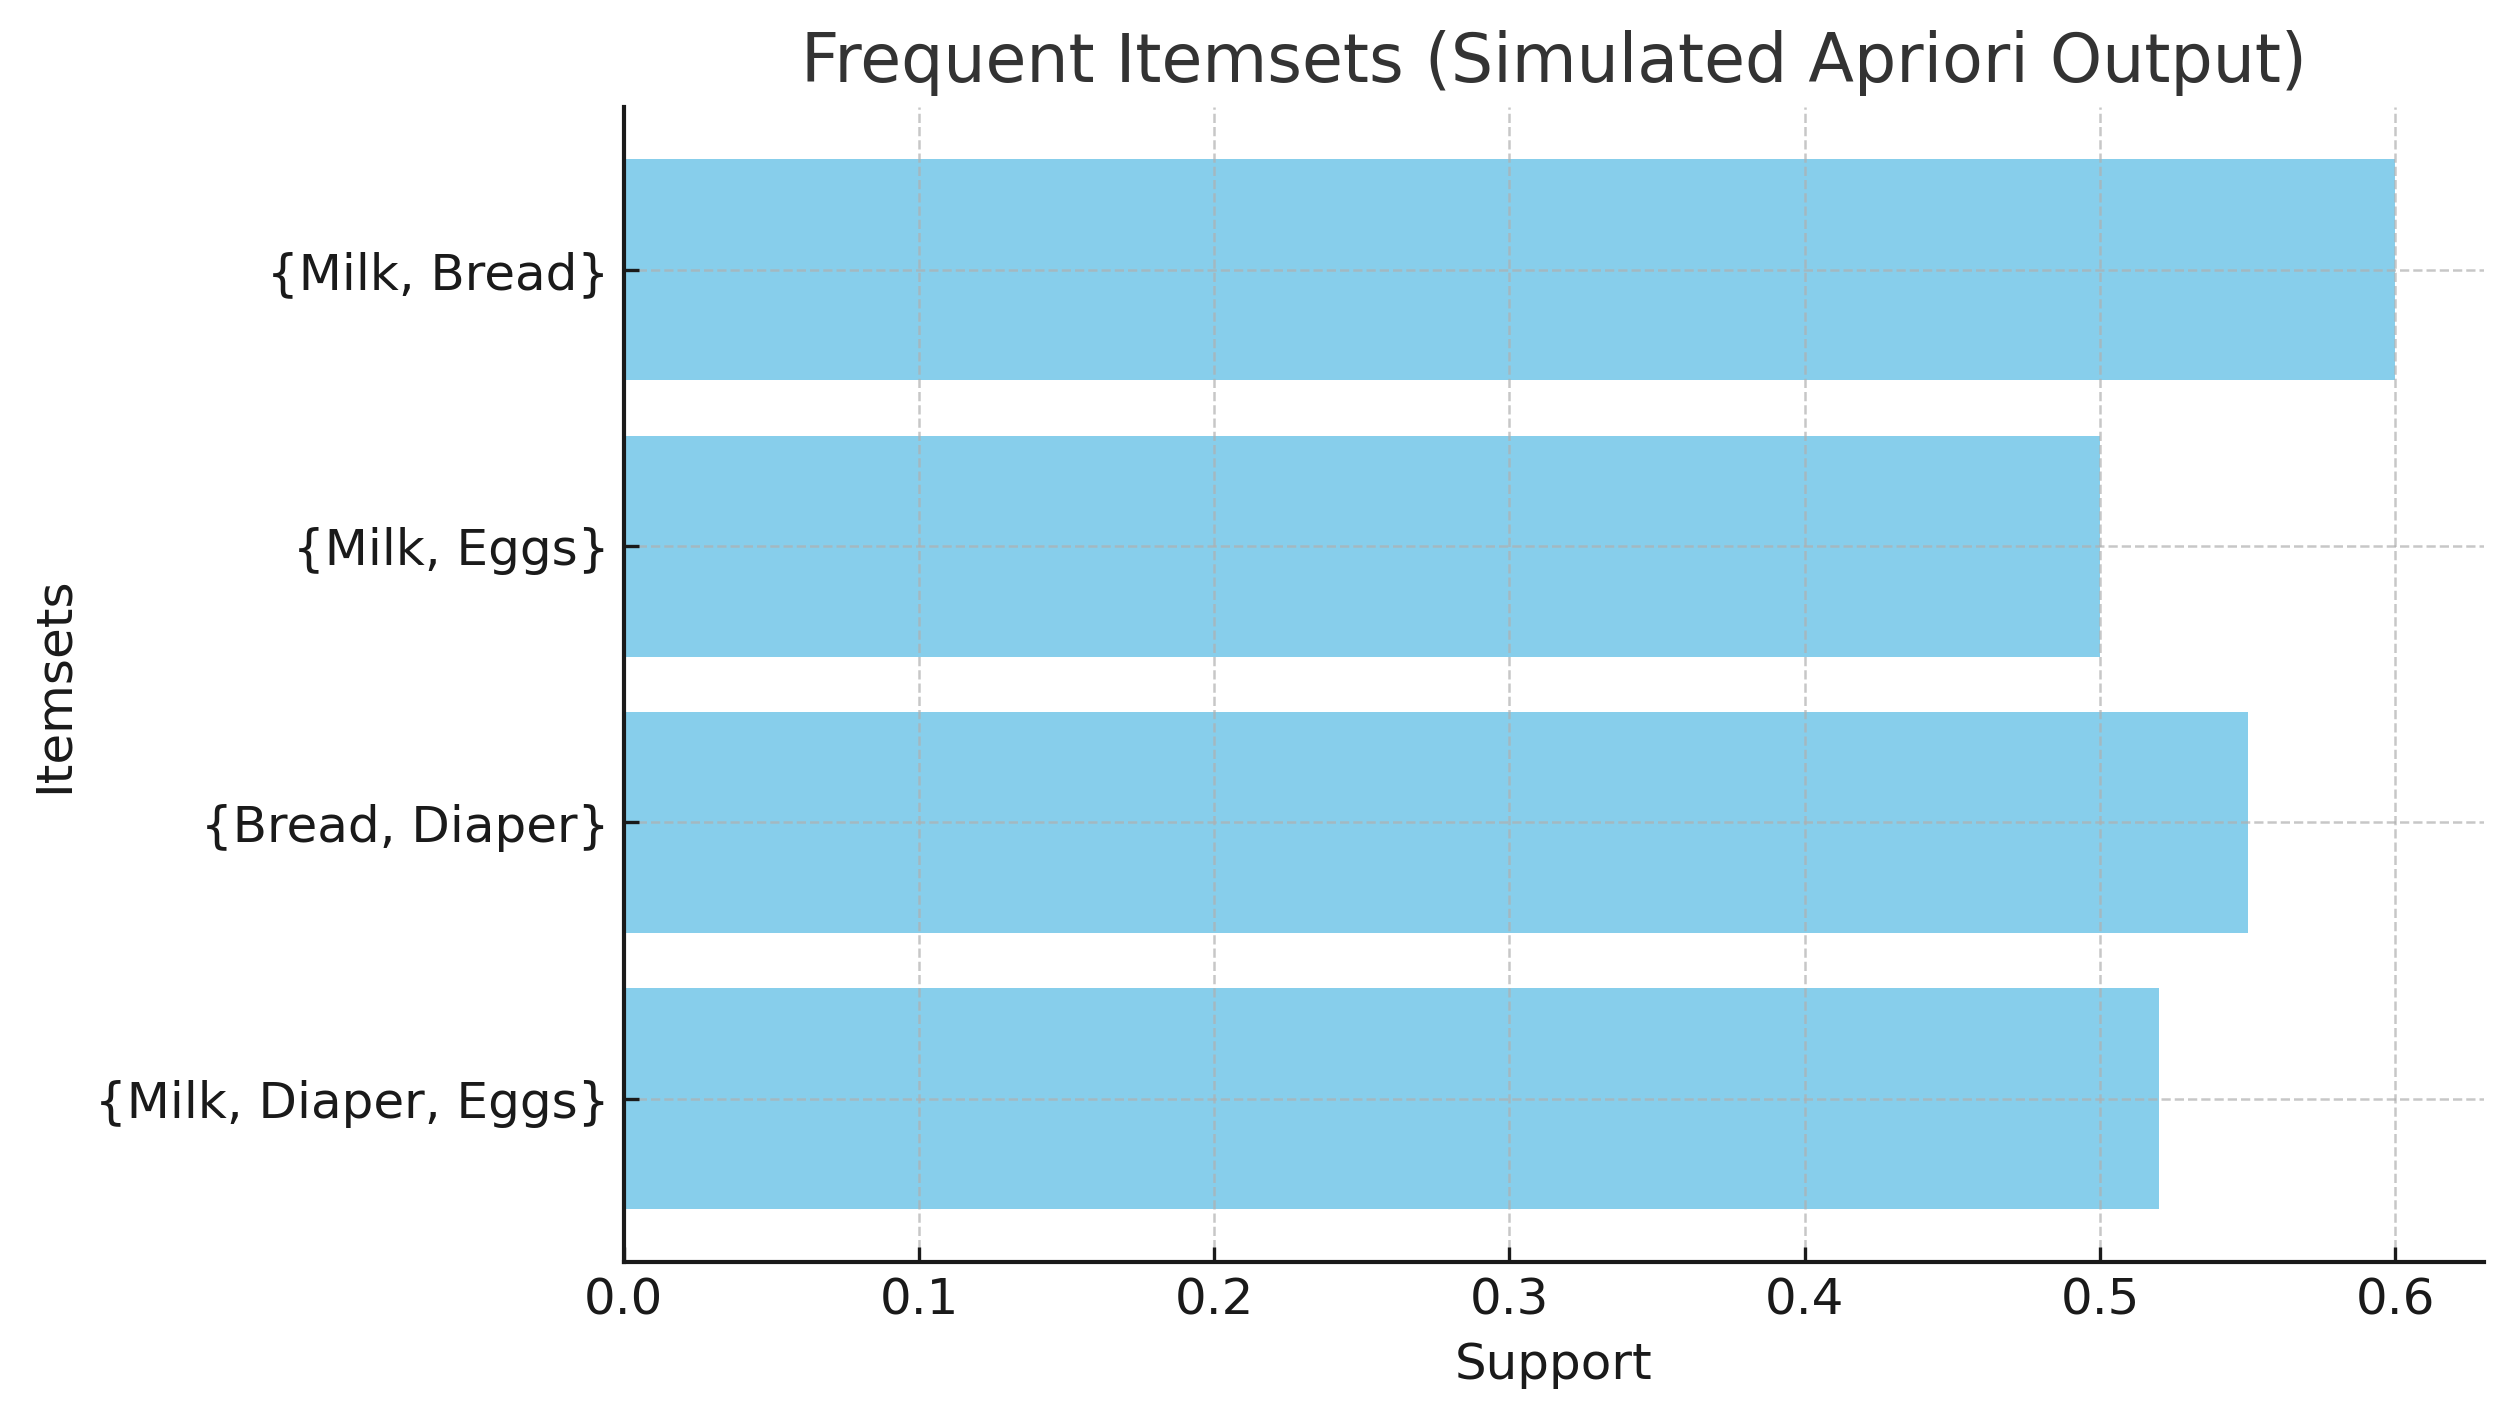

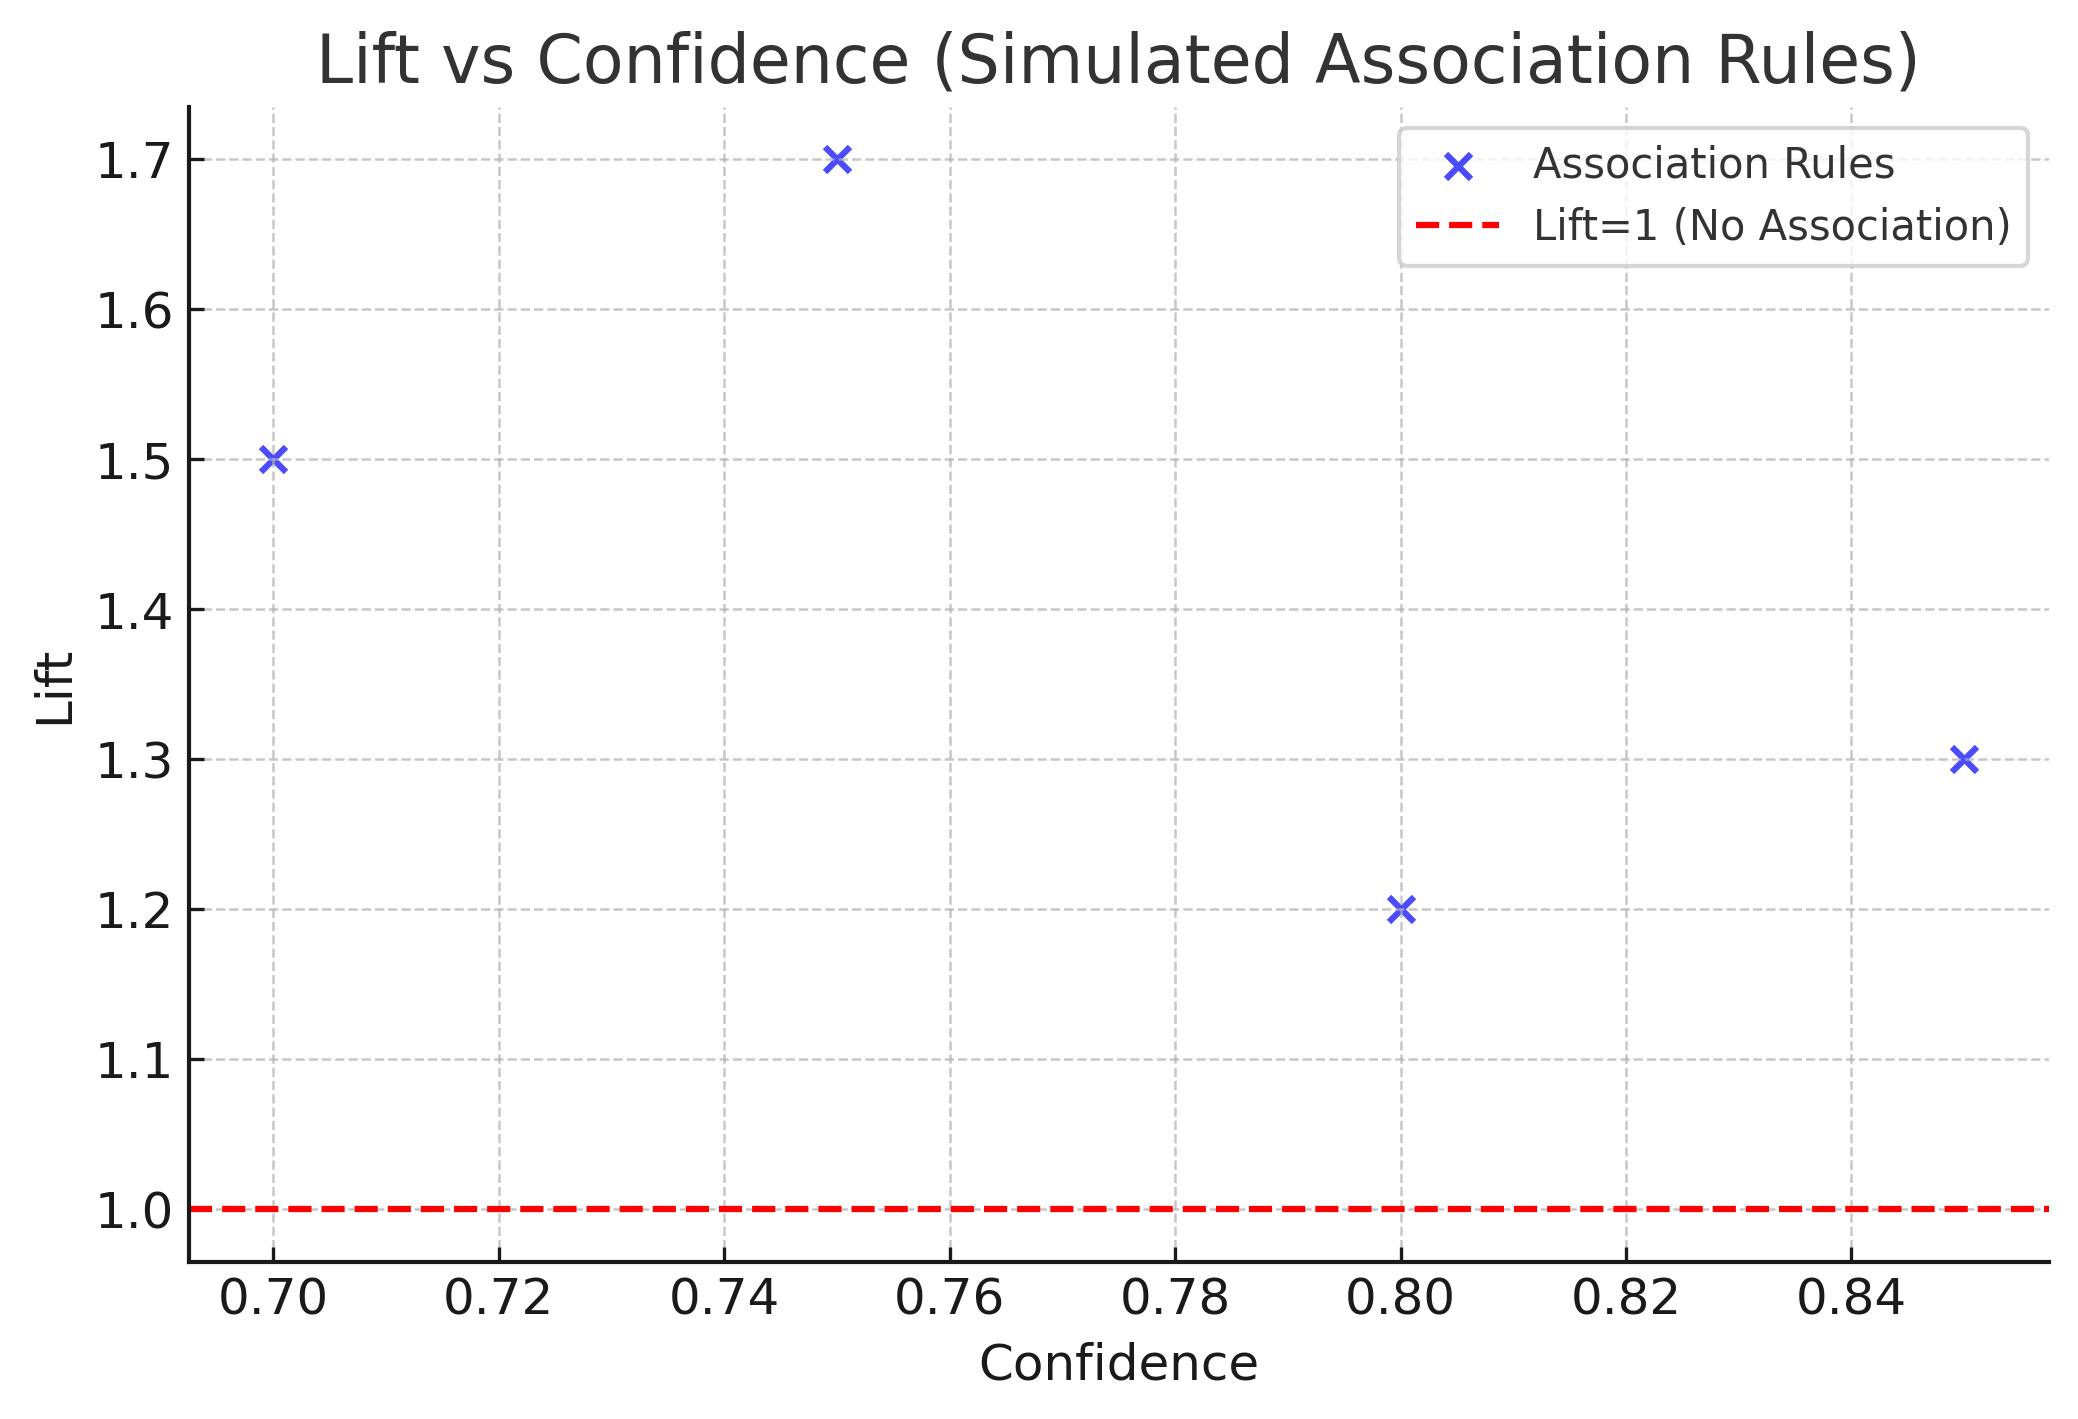

#   Import Required Libraries**  

In [75]:
# 🔹 Import necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth  # Association rule learning
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Statistical data visualization
from collections import Counter  # Counting frequent items

# 🔹 Step 1: Load and Preprocess Data

In [76]:
# 🔹 Step 1: Load and Preprocess Data
print("\n🔹 Loading dataset...")
df = pd.read_csv('Groceries_dataset.csv')  # Load dataset


🔹 Loading dataset...


# 📌 Convert Transactions to List Format**  

---



In [77]:
# Convert transactions into a list format (grouping by member and date)
print("\n🔹 Transforming transactions...")
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()



🔹 Transforming transactions...


# 🔹 Step 2: Identify Top 100 Frequent Items

In [78]:
# 🔹 Step 2: Identify Top 100 Frequent Items
print("\n🔹 Identifying top-100 frequent items...")
flat_list = [item for sublist in transactions for item in sublist]  # Flatten transaction list
item_counts = Counter(flat_list)  # Count item occurrences
top_items = [item for item, count in item_counts.most_common(100)]  # Get top 100 most frequent items


🔹 Identifying top-100 frequent items...


# 🔹 Step 3: Filter Transactions

In [79]:
# 🔹 Step 3: Filter Transactions
# Remove items that are not in the top 100
filtered_transactions = [[item for item in trans if item in top_items] for trans in transactions]
filtered_transactions = [trans for trans in filtered_transactions if len(trans) > 1]  # Remove empty transactions

# 🔹 Step 4: Convert Transactions to One-Hot Encoding

In [80]:
# 🔹 Step 4: Convert Transactions to One-Hot Encoding
# Creating a DataFrame where each row is a transaction and columns are items (1 if item present, else 0)
itemset = pd.DataFrame([[1 if item in trans else 0 for item in top_items] for trans in filtered_transactions], columns=top_items)

#  🔹 Step 5: Run Apriori Algorithm

In [81]:
# 🔹 Step 5: Run Apriori Algorithm
print("\n🔹 Running Apriori Algorithm...")
frequent_apriori = apriori(itemset, min_support=0.001, use_colnames=True)  # Find frequent itemsets
rules_apriori = association_rules(frequent_apriori, metric='lift', min_threshold=1.0)  # Generate rules


🔹 Running Apriori Algorithm...


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# 🔹 Step 6: Run FP-Growth Algorithm

In [82]:
# 🔹 Step 6: Run FP-Growth Algorithm
print("\n🔹 Running FP-Growth Algorithm...")
frequent_fpgrowth = fpgrowth(itemset, min_support=0.003, use_colnames=True)  # Find frequent itemsets
rules_fpgrowth = association_rules(frequent_fpgrowth, metric='lift', min_threshold=1.0)  # Generate rules


🔹 Running FP-Growth Algorithm...


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# 🔹 Step 7: Display Top 5 and Top 10 Association Rules

In [83]:
# 🔹 Step 7: Display Top 5 and Top 10 Association Rules
print("\n📌 Top 5 Association Rules (Apriori):")
top_5_apriori = rules_apriori.nlargest(5, 'lift')  # Get top 5 rules by lift
print(top_5_apriori)

print("\n📌 Top 10 Association Rules (Apriori):")
top_10_apriori = rules_apriori.nlargest(10, 'lift')  # Get top 10 rules by lift
print(top_10_apriori)

print("\n📌 Top 5 Association Rules (FP-Growth):")
top_5_fpgrowth = rules_fpgrowth.nlargest(5, 'lift')  # Get top 5 rules by lift
print(top_5_fpgrowth)

print("\n📌 Top 10 Association Rules (FP-Growth):")
top_10_fpgrowth = rules_fpgrowth.nlargest(10, 'lift')  # Get top 10 rules by lift
print(top_10_fpgrowth)


📌 Top 5 Association Rules (Apriori):
               antecedents            consequents  antecedent support  \
212   (yogurt, whole milk)              (sausage)            0.011833   
217              (sausage)   (yogurt, whole milk)            0.062141   
214  (whole milk, sausage)               (yogurt)            0.009495   
215               (yogurt)  (whole milk, sausage)            0.088854   
104         (citrus fruit)  (specialty chocolate)            0.054914   

     consequent support   support  confidence      lift  representativity  \
212            0.062141  0.001559    0.131737  2.119952               1.0   
217            0.011833  0.001559    0.025086  2.119952               1.0   
214            0.088854  0.001559    0.164179  1.847735               1.0   
215            0.009495  0.001559    0.017544  1.847735               1.0   
104            0.016226  0.001488    0.027097  1.669942               1.0   

     leverage  conviction  zhangs_metric   jaccard  certaint

# 🔹 Step 8: Visualizing Top 20 Frequent Items

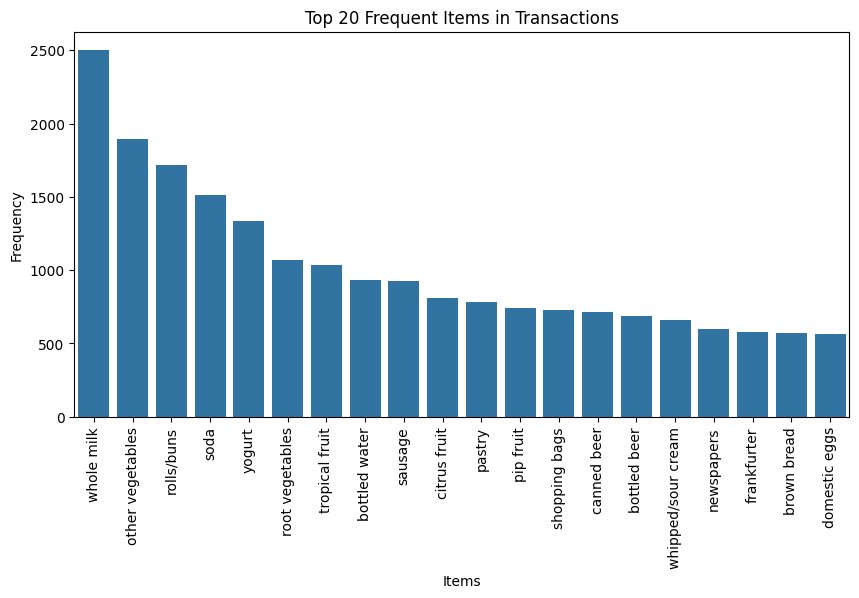

In [84]:
# 🔹 Step 8: Visualizing Top 20 Frequent Items
plt.figure(figsize=(10, 5))
sns.barplot(x=[item for item, _ in item_counts.most_common(20)], y=[count for _, count in item_counts.most_common(20)])
plt.xticks(rotation=90)
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.title("Top 20 Frequent Items in Transactions")
plt.show()

# 🔹 Step 9: Display Tables in Jupyter Notebook (if available)

In [85]:
# 🔹 Step 9: Display Tables in Jupyter Notebook (if available)
try:
    import IPython.display as display
    display.display(top_5_apriori)
    display.display(top_10_apriori)
    display.display(top_5_fpgrowth)
    display.display(top_10_fpgrowth)
except:
    pass  # Ignore if running outside Jupyter

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
212,"(yogurt, whole milk)",(sausage),0.011833,0.062141,0.001559,0.131737,2.119952,1.0,0.000824,1.080155,0.534617,0.021526,0.074207,0.078411
217,(sausage),"(yogurt, whole milk)",0.062141,0.011833,0.001559,0.025086,2.119952,1.0,0.000824,1.013593,0.563295,0.021526,0.013411,0.078411
214,"(whole milk, sausage)",(yogurt),0.009495,0.088854,0.001559,0.164179,1.847735,1.0,0.000715,1.090121,0.463195,0.016105,0.082670,0.090861
215,(yogurt),"(whole milk, sausage)",0.088854,0.009495,0.001559,0.017544,1.847735,1.0,0.000715,1.008193,0.503538,0.016105,0.008126,0.090861
104,(citrus fruit),(specialty chocolate),0.054914,0.016226,0.001488,0.027097,1.669942,1.0,0.000597,1.011173,0.424487,0.021363,0.011050,0.059400


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
212,"(yogurt, whole milk)",(sausage),0.011833,0.062141,0.001559,0.131737,2.119952,1.0,0.000824,1.080155,0.534617,0.021526,0.074207,0.078411
217,(sausage),"(yogurt, whole milk)",0.062141,0.011833,0.001559,0.025086,2.119952,1.0,0.000824,1.013593,0.563295,0.021526,0.013411,0.078411
214,"(whole milk, sausage)",(yogurt),0.009495,0.088854,0.001559,0.164179,1.847735,1.0,0.000715,1.090121,0.463195,0.016105,0.082670,0.090861
215,(yogurt),"(whole milk, sausage)",0.088854,0.009495,0.001559,0.017544,1.847735,1.0,0.000715,1.008193,0.503538,0.016105,0.008126,0.090861
104,(citrus fruit),(specialty chocolate),0.054914,0.016226,0.001488,0.027097,1.669942,1.0,0.000597,1.011173,0.424487,0.021363,0.011050,0.059400
105,(specialty chocolate),(citrus fruit),0.016226,0.054914,0.001488,0.091703,1.669942,1.0,0.000597,1.040503,0.407794,0.021363,0.038927,0.059400
70,(tropical fruit),(flour),0.070006,0.009991,0.001134,0.016194,1.620926,1.0,0.000434,1.006306,0.411905,0.014376,0.006266,0.064835
71,(flour),(tropical fruit),0.009991,0.070006,0.001134,0.113475,1.620926,1.0,0.000434,1.049033,0.386935,0.014376,0.046741,0.064835
213,"(yogurt, sausage)",(whole milk),0.006094,0.163962,0.001559,0.255814,1.560200,1.0,0.000560,1.123426,0.361258,0.009251,0.109865,0.132661
216,(whole milk),"(yogurt, sausage)",0.163962,0.006094,0.001559,0.009507,1.560200,1.0,0.000560,1.003446,0.429474,0.009251,0.003435,0.132661


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(curd),(sausage),0.034791,0.062141,0.003118,0.089613,1.442085,1.0,0.000956,1.030176,0.317610,0.033233,0.029292,0.069892
9,(sausage),(curd),0.062141,0.034791,0.003118,0.050171,1.442085,1.0,0.000956,1.016193,0.326872,0.033233,0.015935,0.069892
13,(sausage),(bottled beer),0.062141,0.047332,0.003543,0.057013,1.204518,1.0,0.000602,1.010266,0.181043,0.033445,0.010161,0.065931
12,(bottled beer),(sausage),0.047332,0.062141,0.003543,0.074850,1.204518,1.0,0.000602,1.013737,0.178228,0.033445,0.013551,0.065931
0,(yogurt),(sausage),0.088854,0.062141,0.006094,0.068581,1.103623,1.0,0.000572,1.006913,0.103050,0.042054,0.006866,0.083321


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(curd),(sausage),0.034791,0.062141,0.003118,0.089613,1.442085,1.0,0.000956,1.030176,0.317610,0.033233,0.029292,0.069892
9,(sausage),(curd),0.062141,0.034791,0.003118,0.050171,1.442085,1.0,0.000956,1.016193,0.326872,0.033233,0.015935,0.069892
13,(sausage),(bottled beer),0.062141,0.047332,0.003543,0.057013,1.204518,1.0,0.000602,1.010266,0.181043,0.033445,0.010161,0.065931
12,(bottled beer),(sausage),0.047332,0.062141,0.003543,0.074850,1.204518,1.0,0.000602,1.013737,0.178228,0.033445,0.013551,0.065931
0,(yogurt),(sausage),0.088854,0.062141,0.006094,0.068581,1.103623,1.0,0.000572,1.006913,0.103050,0.042054,0.006866,0.083321
1,(sausage),(yogurt),0.062141,0.088854,0.006094,0.098062,1.103623,1.0,0.000572,1.010208,0.100115,0.042054,0.010105,0.083321
6,(other vegetables),(frankfurter),0.126763,0.039255,0.005456,0.043041,1.096453,1.0,0.000480,1.003957,0.100738,0.033981,0.003941,0.091015
7,(frankfurter),(other vegetables),0.039255,0.126763,0.005456,0.138989,1.096453,1.0,0.000480,1.014200,0.091562,0.033981,0.014001,0.091015
4,(pastry),(sausage),0.053709,0.062141,0.003401,0.063325,1.019041,1.0,0.000064,1.001263,0.019746,0.030246,0.001262,0.059028
5,(sausage),(pastry),0.062141,0.053709,0.003401,0.054732,1.019041,1.0,0.000064,1.001082,0.019924,0.030246,0.001081,0.059028
